In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.model_selection import train_test_split,cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/My Drive/PGML/supervisedlearning/Residency-III-lab/Iris.csv'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(file)
randRows = df.sample(n=10, random_state=1)
randRows

,SepalLengthInCm,SepalWidthInCm,PetallengthInCm,PetalwidthInCm,Class
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [0]:
df.isnull().values.any()
# there is n ot null value so ignoring this step but we can achieve using df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median()))


False

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [0]:
LabelEncoder = preprocessing.LabelEncoder() 
df['Class'] = LabelEncoder.fit_transform(df['Class']) 
df.head()

,SepalLengthInCm,SepalWidthInCm,PetallengthInCm,PetalwidthInCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [0]:
df.corr()


,SepalLengthInCm,SepalWidthInCm,PetallengthInCm,PetalwidthInCm,Class
SepalLengthInCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthInCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetallengthInCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalwidthInCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
#as SepalWidthin(cm) is not corelating with target field class, droping the same
df.drop('SepalWidthInCm', axis=1, inplace=True)
df.head()

,SepalLengthInCm,PetallengthInCm,PetalwidthInCm,Class
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [0]:
df.var()
# there is not fecture which could be drop as variance is >0.1 for all features 

SepalLengthInCm    0.685694
PetallengthInCm    3.113179
PetalwidthInCm     0.582414
Class              0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

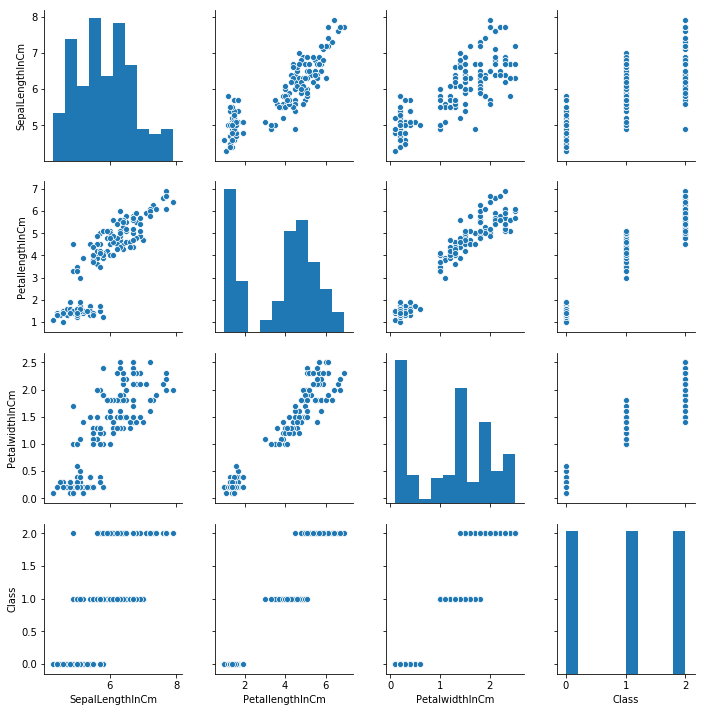

In [0]:
sns.pairplot(df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
x = df.drop(['Class'], axis=1)

y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
y_train = y_train.values.ravel()


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [0]:
listK = [3,5,9]

for i in listK:
  Model = KNeighborsClassifier(n_neighbors = i, weights = 'uniform', metric = 'euclidean')
  Model.fit(X_train, y_train)
  pridict = pd.DataFrame(Model.predict(X_test))
  aquracy = accuracy_score(y_test, pridict)
  print(aquracy)




1.0
1.0
0.9666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [0]:
listN = [1,3,5,7,9,11,13,15,17,19]
cv_scores = []
for i in listN:
  Model = KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(Model, X_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())
  
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = listN[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 9


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

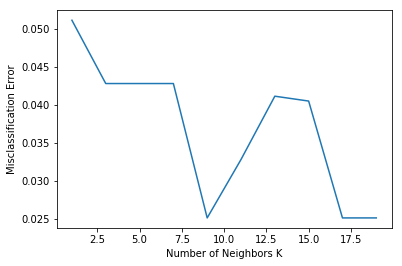

In [0]:

# plot misclassification error vs k
plt.plot(listN, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
df = pd.read_csv(file)
LabelEncoder = preprocessing.LabelEncoder() 
df['Class'] = LabelEncoder.fit_transform(df['Class']) 


#as SepalWidthin(cm) is not corelating with target field class, droping the same
df.drop('SepalWidthInCm', axis=1, inplace=True)



X = df.drop(['Class'], axis=1)

#doing fetaure scaling here rather than in step 13(question-13)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

y = df[['Class']]

In [55]:
#Check the dataset
print(y.head(5))
print(X.head(5))

   Class
0      0
1      0
2      0
3      0
4      0
   SepalLengthInCm  PetallengthInCm  PetalwidthInCm
0         0.222222         0.067797        0.041667
1         0.166667         0.067797        0.041667
2         0.111111         0.050847        0.041667
3         0.083333         0.084746        0.041667
4         0.194444         0.067797        0.041667


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

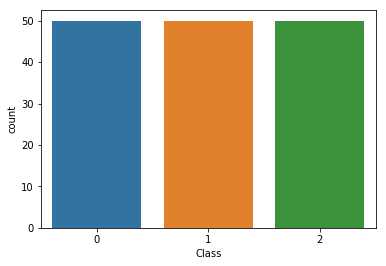

In [56]:
import seaborn as sns
sns.countplot(x='Class',data=df)

In [0]:
#Drop Id variable from data
# there is no Id variable in the current dataframe

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [0]:
# I have done the same in step 10 (question 10),as SepalWidthin(cm) is not corelating with target field class, has deleted the same

### Split data in Training and test set in 80:20.

In [0]:
X_train, X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2)
Y_train = Y_train.values.ravel()


### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [0]:
# I have done the same in step 10 (question 10)

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [59]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_GNB

array([1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 1, 1, 2, 2, 2])

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [60]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[ 7  0  0]
 [ 0  8  1]
 [ 0  1 13]]


In [61]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.9333333333333333

In [0]:
#Show precision and Recall metrics

In [62]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      0.89      0.89         9
           2       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

